In [17]:
##%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import gmaps
import requests
import json
from IPython.display import display
import ipywidgets as widgets
import calmap
import scipy.stats as st
from scipy.stats import linregress

In [18]:
diep_df = pd.read_csv("../CleanDatasets/diepkloof_AQI.csv")
diep_df.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2020-07-02,83,49,13,9,1,7,83
1,2020-07-03,99,39,10,11,11,5,99
2,2020-07-04,84,55,19,12,6,6,84
3,2020-07-05,110,39,15,7,2,5,110
4,2020-07-06,89,48,10,13,4,9,89


In [19]:
diep_2019 =diep_df[(diep_df['date']>='2019-01-01') & (diep_df['date']<='2019-12-31')]

In [20]:
diep_2019 = diep_2019.sort_values('date')
diep_2019.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
370,2019-02-01,97,65,10,9,2,7,97
371,2019-02-02,129,52,9,7,2,6,129
372,2019-02-03,111,50,10,7,1,6,111
373,2019-02-05,90,46,11,10,2,7,90
374,2019-02-06,89,48,13,9,1,7,89


In [21]:
diep_2019[['year','month','day']] = diep_2019['date'].str.split('-',expand=True)
diep_2019.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,year,month,day
370,2019-02-01,97,65,10,9,2,7,97,2019,02,01
371,2019-02-02,129,52,9,7,2,6,129,2019,02,02
372,2019-02-03,111,50,10,7,1,6,111,2019,02,03
373,2019-02-05,90,46,11,10,2,7,90,2019,02,05
374,2019-02-06,89,48,13,9,1,7,89,2019,02,06


In [22]:
diep_2019['day'] = diep_2019['day'].astype(str).astype('int64')
diep_2019['year'] = diep_2019['year'].astype(str).astype('int64')
diep_2019['month'] = diep_2019['month'].astype(str).astype(int)

In [23]:
diep_2019['AQI'].max()

194

In [24]:
diep_2019aq = diep_2019.pivot_table('AQI','month','day')

Text(0.5, 42.0, 'Day')

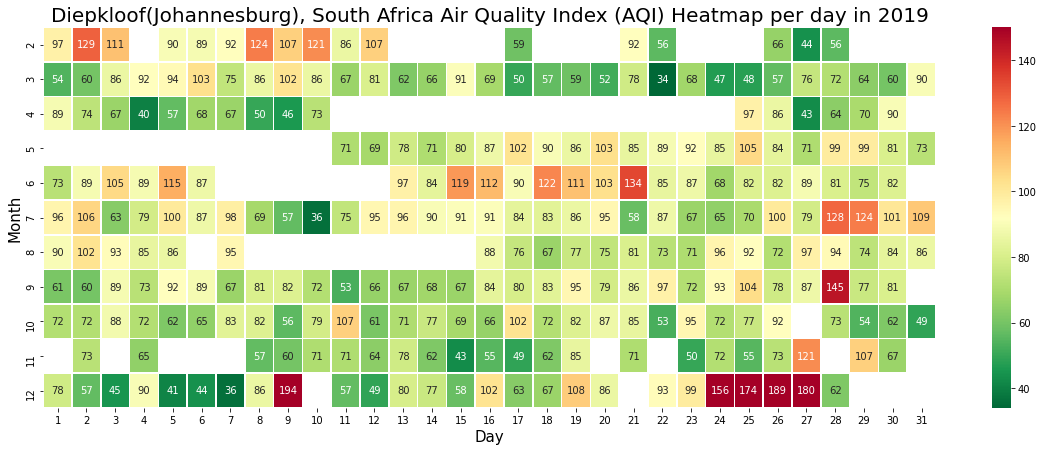

In [25]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(diep_2019aq, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=150, cmap = "RdYlGn_r")
plt.title("Diepkloof(Johannesburg), South Africa Air Quality Index (AQI) Heatmap per day in 2019", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2019_DiepkloofAQI_CalendarHeatmap.png")

In [26]:
diep_2020 =diep_df[(diep_df['date']>='2020-01-01') & (diep_df['date']<='2020-12-31')]
diep_2020 = diep_2020.sort_values('date')
diep_2020.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
125,2020-01-03,66,19,20,5,1,2,66
126,2020-01-04,66,36,21,5,1,2,66
127,2020-01-06,44,43,21,10,1,5,44
128,2020-01-07,123,23,18,6,1,3,123
129,2020-01-08,65,34,12,7,1,6,65


In [27]:
diep_2020[['year','month','day']] = diep_2020['date'].str.split('-',expand=True)
diep_2020.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,year,month,day
125,2020-01-03,66,19,20,5,1,2,66,2020,01,03
126,2020-01-04,66,36,21,5,1,2,66,2020,01,04
127,2020-01-06,44,43,21,10,1,5,44,2020,01,06
128,2020-01-07,123,23,18,6,1,3,123,2020,01,07
129,2020-01-08,65,34,12,7,1,6,65,2020,01,08


In [28]:
diep_2020['day'] = diep_2020['day'].astype(str).astype('int64')
diep_2020['year'] = diep_2020['year'].astype(str).astype('int64')
diep_2020['month'] = diep_2020['month'].astype(str).astype(int)

In [29]:
diep_2020['AQI'].max()

281

In [30]:
diep_2020aq = diep_2020.pivot_table('AQI','month','day')

Text(0.5, 42.0, 'Day')

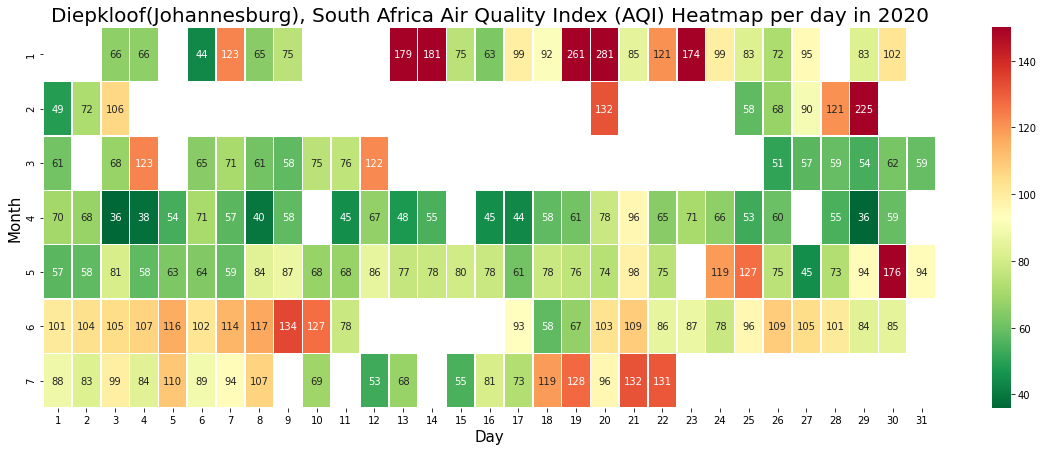

In [31]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(diep_2020aq, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=150, cmap = "RdYlGn_r")
plt.title("Diepkloof(Johannesburg), South Africa Air Quality Index (AQI) Heatmap per day in 2020", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2020_DiepkloofAQI_CalendarHeatmap.png")

The r-squared is: 0.0004312943538633256
The correlation coefficient between 2019 calendar month and AQI in Delhi, India is 0.02


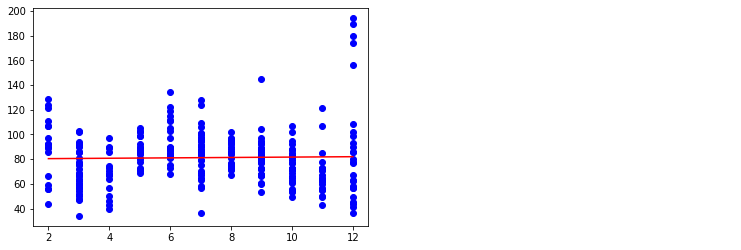

In [33]:
dk_x1 = diep_2019['month']
dk_y1 = diep_2019['AQI']

dkxy1_corr = round(st.pearsonr(dk_x1,dk_y1)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(dk_x1,dk_y1)
regress_values = dk_x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(dk_x1, dk_y1, marker="o", facecolor="b")
plt.plot(dk_x1,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between 2019 calendar month and AQI in Delhi, India is {dkxy1_corr}")


The r-squared is: 0.009110168782704446
The correlation coefficient between 2019 calendar month and AQI in Delhi, India is -0.1


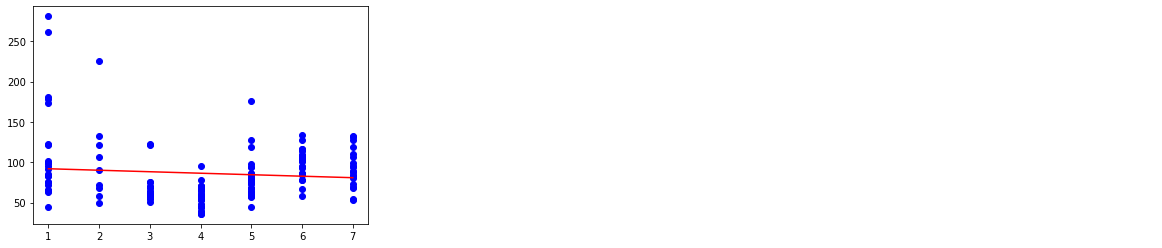

In [34]:
dk_x2 = diep_2020['month']
dk_y2 = diep_2020['AQI']

dkxy2_corr = round(st.pearsonr(dk_x2,dk_y2)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(dk_x2,dk_y2)
regress_values = dk_x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(dk_x2, dk_y2, marker="o", facecolor="b")
plt.plot(dk_x2,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between 2019 calendar month and AQI in Delhi, India is {dkxy2_corr}")
